In [25]:
import os
os.chdir("/Users/syedarijaali/Desktop/LAYR---ml_db_proj-main-2")
os.getcwd()


'/Users/syedarijaali/Desktop/LAYR---ml_db_proj-main-2'

In [26]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

FEATURES_PATH = "data/ml/segmentation/features.parquet"


In [27]:
df = pd.read_parquet("/Users/syedarijaali/Desktop/LAYR---ml_db_proj-main-2/data/ml/segmentation/features.parquet")
df.head()


,customer_id,recency_days,frequency,monetary,last_purchase_date,first_purchase_date,cat_Accessories,cat_Garment Lower body,cat_Garment Upper body,total_events,unique_sessions,purchase_count,avg_price,conversion,has_purchase
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2087,4,0.14,2020-03-21,2018-12-27,0.0,3.0,30.0,33,33,4,0.035,0.121212,1
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2294,5,0.36,2019-08-27,2019-04-09,0.0,7.0,26.0,33,33,5,0.072,0.151515,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1909,1,0.06,2020-09-15,2020-09-15,1.0,4.0,40.0,45,45,1,0.060,0.022222,1
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2251,2,0.10,2019-10-09,2019-10-01,0.0,6.0,37.0,43,43,2,0.050,0.046512,1
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,2238,1,0.03,2019-10-22,2019-10-22,0.0,6.0,27.0,33,33,1,0.030,0.030303,1


In [28]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
df.describe()


Shape: (557567, 15)

Missing values:
 customer_id               0
recency_days              0
frequency                 0
monetary                  0
last_purchase_date        0
first_purchase_date       0
cat_Accessories           0
cat_Garment Lower body    0
cat_Garment Upper body    0
total_events              0
unique_sessions           0
purchase_count            0
avg_price                 0
conversion                0
has_purchase              0
dtype: int64


,recency_days,frequency,monetary,last_purchase_date,cat_Accessories,cat_Garment Lower body,cat_Garment Upper body,total_events,unique_sessions,purchase_count,avg_price,conversion,has_purchase
count,557567.000000,557567.000000,557567.000000,557567,557567.000000,557567.000000,557567.000000,557567.000000,557567.000000,557567.000000,557567.000000,557567.000000,557567.0
mean,2215.328292,3.563776,0.168460,2019-11-13 16:07:15.537970688,0.287933,6.924171,33.433435,40.645539,40.645539,3.563776,0.047000,0.080854,1.0
min,1902.000000,1.000000,0.000000,2018-09-20 00:00:00,0.000000,0.000000,11.000000,14.000000,14.000000,1.000000,0.000000,0.014493,1.0
25%,2020.000000,1.000000,0.050000,2019-05-02 00:00:00,0.000000,5.000000,29.000000,36.000000,36.000000,1.000000,0.030000,0.027778,1.0
50%,2186.000000,2.000000,0.090000,2019-12-13 00:00:00,0.000000,6.000000,33.000000,40.000000,40.000000,2.000000,0.042000,0.052632,1.0
75%,2411.000000,4.000000,0.190000,2020-05-27 00:00:00,1.000000,8.000000,37.000000,45.000000,45.000000,4.000000,0.060000,0.100000,1.0
max,2635.000000,152.000000,12.860000,2020-09-22 00:00:00,41.000000,115.000000,178.000000,190.000000,190.000000,152.000000,0.510000,0.843931,1.0
std,223.142872,4.667030,0.245563,NaN,0.539934,3.933742,6.239927,7.666588,7.666588,4.667030,0.024272,0.078596,0.0


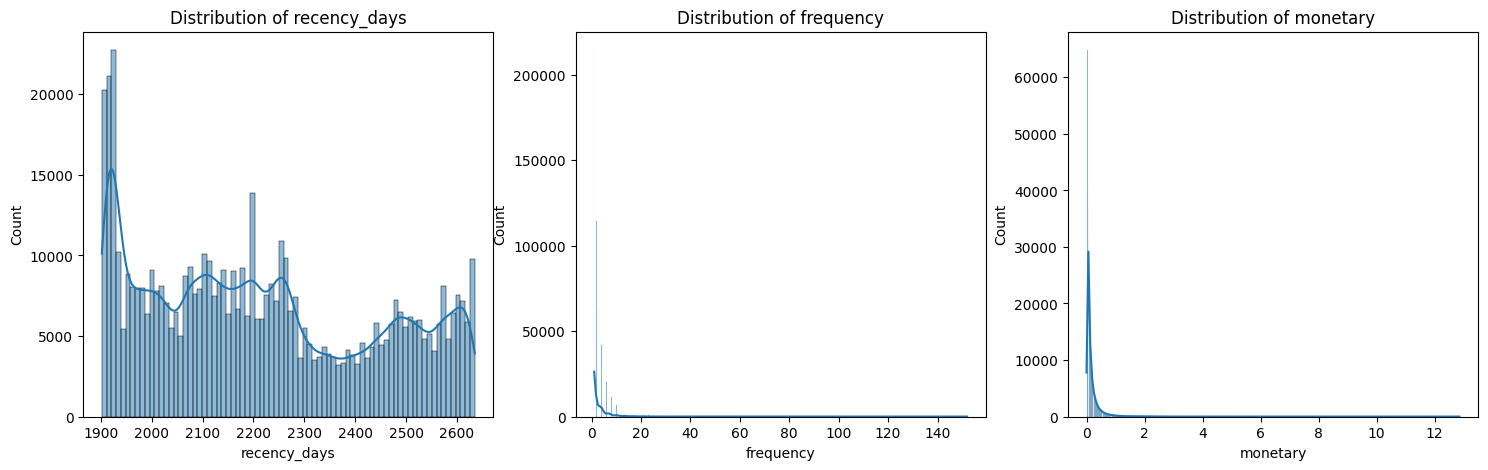

,recency_days,frequency,monetary
count,557567.000000,557567.000000,557567.000000
mean,2215.328292,3.563776,0.168460
std,223.142872,4.667030,0.245563
min,1902.000000,1.000000,0.000000
25%,2020.000000,1.000000,0.050000
50%,2186.000000,2.000000,0.090000
75%,2411.000000,4.000000,0.190000
max,2635.000000,152.000000,12.860000


In [29]:
rfm_cols = ["recency_days", "frequency", "monetary"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(rfm_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.show()

df[rfm_cols].describe()


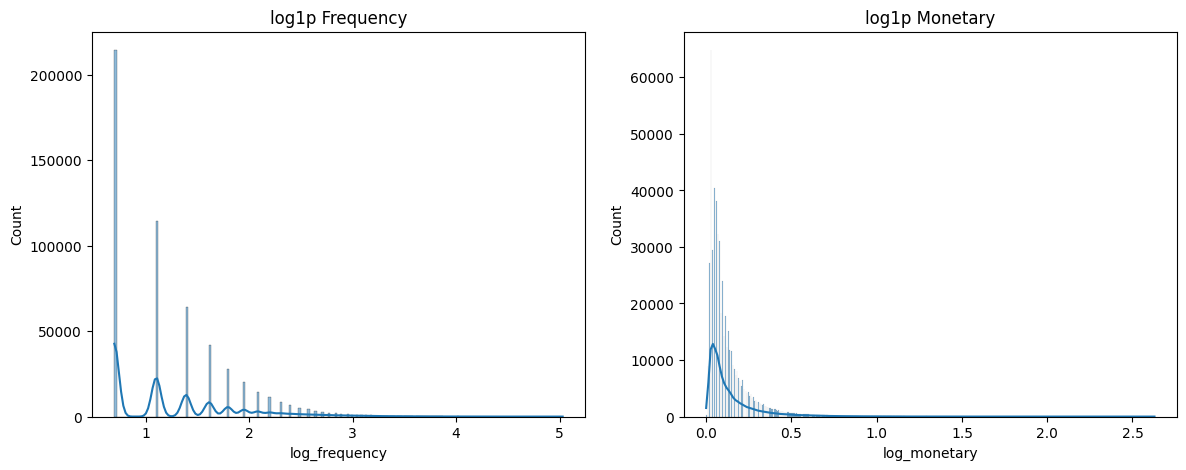

In [30]:
import numpy as np

for col in ["frequency", "monetary"]:
    df[f"log_{col}"] = np.log1p(df[col])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["log_frequency"], kde=True, ax=axes[0])
sns.histplot(df["log_monetary"],  kde=True, ax=axes[1])
axes[0].set_title("log1p Frequency")
axes[1].set_title("log1p Monetary")
plt.show()


In [31]:
cat_cols = [c for c in df.columns if c.startswith("cat_")]

print("Number of category features:", len(cat_cols))

df[cat_cols].sum().sort_values(ascending=False)


Number of category features: 3


cat_Garment Upper body    18641380.0
cat_Garment Lower body     3860689.0
cat_Accessories             160542.0
dtype: float64

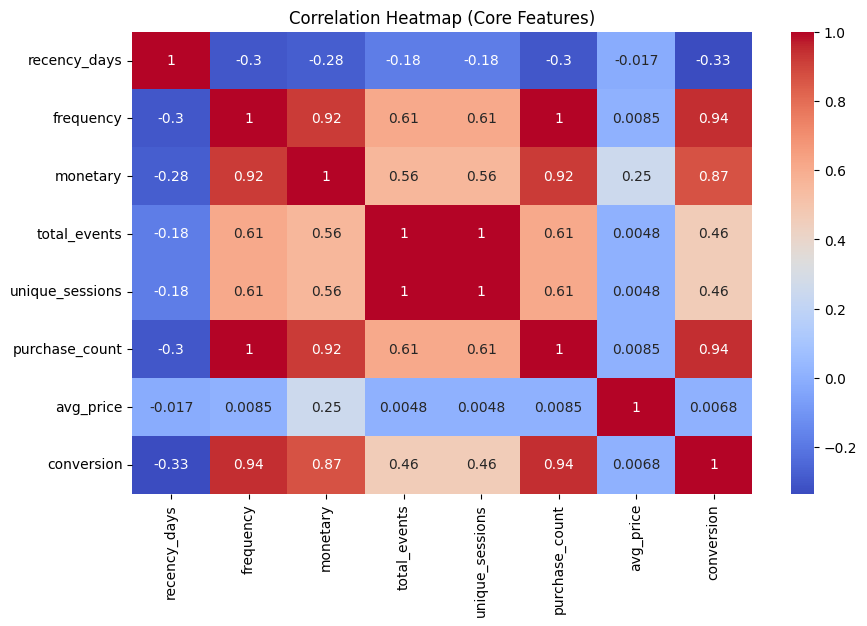

In [32]:
corr_cols = ["recency_days", "frequency", "monetary", 
             "total_events", "unique_sessions", 
             "purchase_count", "avg_price", "conversion"]

plt.figure(figsize=(10,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Core Features)")
plt.show()


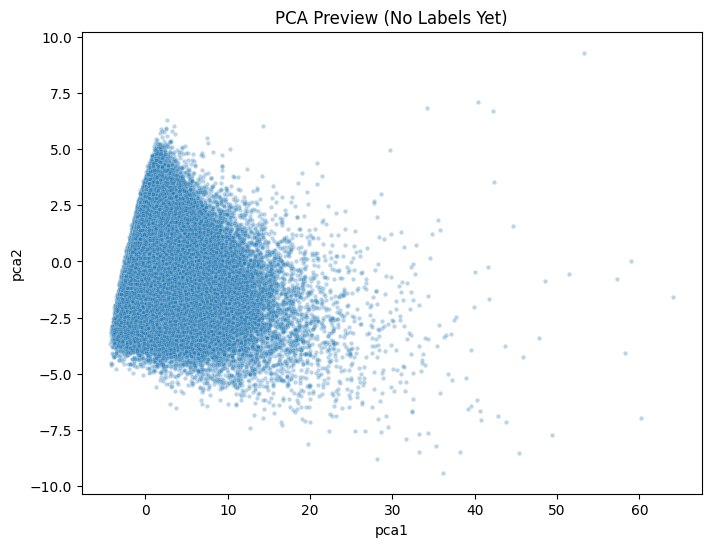

Explained variance ratio: [0.51075986 0.1543067 ]


In [33]:
# Combine useful features
feature_candidates = ["recency_days","frequency","monetary","total_events",
                      "unique_sessions","purchase_count","avg_price","conversion"] + cat_cols

X = df[feature_candidates].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["pca1"], y=df["pca2"], s=10, alpha=0.3)
plt.title("PCA Preview (No Labels Yet)")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


In [34]:
print("Recommended segmentation features:")

recommended = [
    "recency_days",
    "frequency",
    "monetary",
    "total_events",
    "purchase_count",
    "conversion",
] + cat_cols

recommended


Recommended segmentation features:


['recency_days',
 'frequency',
 'monetary',
 'total_events',
 'purchase_count',
 'conversion',
 'cat_Accessories',
 'cat_Garment Lower body',
 'cat_Garment Upper body']

In [35]:
import os
os.makedirs("data/ml/segmentation", exist_ok=True)


In [36]:
model_df = df[["customer_id"] + recommended]
model_df.to_parquet("data/ml/segmentation/model_features.parquet", index=False)

print("Saved model_features.parquet with shape:", model_df.shape)


Saved model_features.parquet with shape: (557567, 10)


In [37]:
import os
os.listdir("data/ml/segmentation")


['model_features.parquet', 'features_sample.csv', 'features.parquet']

In [39]:
import pandas as pd

df = pd.read_parquet("/Users/syedarijaali/Desktop/LAYR---ml_db_proj-main-2/data/ml/segmentation/features.parquet")
print(df.dtypes)


customer_id                       object
recency_days                       int64
frequency                          int64
monetary                         float64
last_purchase_date        datetime64[ns]
first_purchase_date               object
cat_Accessories                  float64
cat_Garment Lower body           float64
cat_Garment Upper body           float64
total_events                       int64
unique_sessions                    int64
purchase_count                     int64
avg_price                        float64
conversion                       float64
has_purchase                       int64
dtype: object
